# Ağ Öğeleri


## Nöron

Nöron,SNN'nin temel yapı taşıdır .

Bu nöron, genel [entegre ve ateş modeli] ( http://neuronaldynamics.epfl.ch/online/Ch1.S3.html )taklit eder .

*  Uyaran yokluğunda, zar bir dinlenme potansiyeline ***(Pref)*** sahiptir. Bağlanan nöronlardan gelen her bir giriş, membran potansiyelini arttırır veya azaltır.


* Nörondaki Potansiyel bir eşik değerini ***(Pth)*** geçtiği zaman yani aksiyon potansiyeli oluştuktan sonra, yeni girişe izin verilmez ve potansiyelin sabit kaldığı refrakter döneme ***(t_ref)*** girer.(Nöron etkinleştikten hemen sonra, saniyenin 1000'de 2 ya da 3'ü kadar bir süre için tamamiyle pasifize olur, ateşleme yapamaz (refractory period).)



*  Membranın güçlü negatif polarizasyonunu önlemek için, potansiyeli ***Pmin*** ile sınırlıdır.


*  ***Pn> Pmin*** olduğu sürece, sürekli bir potansiyel sızıntı vardır.

### Rastgele Oluşan Spike  Traininden Aksiyon potansiyeli oluşturma

In [2]:
import numpy as np 
import random
from matplotlib import pyplot as plt

**T**:50 zaman biriminde

**dt**:0.125 ile aralıkla

**time**:50 zaman birimini 0.125 ile ayırdığı dizi

In [3]:
#defining time scale
T = 50
dt = 0.125
time  = np.arange(0, T+dt, dt)

In [4]:
time

array([ 0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,
        1.   ,  1.125,  1.25 ,  1.375,  1.5  ,  1.625,  1.75 ,  1.875,
        2.   ,  2.125,  2.25 ,  2.375,  2.5  ,  2.625,  2.75 ,  2.875,
        3.   ,  3.125,  3.25 ,  3.375,  3.5  ,  3.625,  3.75 ,  3.875,
        4.   ,  4.125,  4.25 ,  4.375,  4.5  ,  4.625,  4.75 ,  4.875,
        5.   ,  5.125,  5.25 ,  5.375,  5.5  ,  5.625,  5.75 ,  5.875,
        6.   ,  6.125,  6.25 ,  6.375,  6.5  ,  6.625,  6.75 ,  6.875,
        7.   ,  7.125,  7.25 ,  7.375,  7.5  ,  7.625,  7.75 ,  7.875,
        8.   ,  8.125,  8.25 ,  8.375,  8.5  ,  8.625,  8.75 ,  8.875,
        9.   ,  9.125,  9.25 ,  9.375,  9.5  ,  9.625,  9.75 ,  9.875,
       10.   , 10.125, 10.25 , 10.375, 10.5  , 10.625, 10.75 , 10.875,
       11.   , 11.125, 11.25 , 11.375, 11.5  , 11.625, 11.75 , 11.875,
       12.   , 12.125, 12.25 , 12.375, 12.5  , 12.625, 12.75 , 12.875,
       13.   , 13.125, 13.25 , 13.375, 13.5  , 13.625, 13.75 , 13.875,
      

**S (spike train)**:Yukarıdaki zaman anlarında rastgele şekilde spike(uyarı-vuru)  olayı atama : 0 (spike yok) ve 1(spike var)

In [5]:
#generating random spike train to be fed to neuron
S = []
for k in range(len(time)):
    a = random.randrange(0,2)
    S.append(a)

In [6]:
S

[1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,


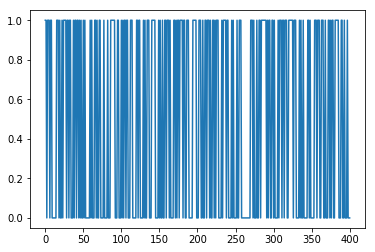

In [7]:
plt.plot(S) #spike train : 50 zaman biriminde (TimeUnit)  0.125 aralıkla 401 tane rastgele 0 ve 1 den oluşan spikeler
#https://github.com/Shikhargupta/Spiking-Neural-Network/tree/master/neuron

---------------------------
______________________
**Pn** : membran potansiyeli vektörü 0 ile başlatılması

In [10]:
#initialising membrane potential vector
Pn = np.zeros(len(time))

Diğer parametreleri tanımlamak

In [11]:
#definig other parameters
Pref = 0 #resting potential
Pmin = -1 #minimum potential
Pth = 25 #threshold
D = 0.25 #leakage factor
Pspike = 4 #spike potential : 

count = 0 #refractory counter
t_ref = 5 #refractory period :
            #bir nöronun etkinleştikten hemen sonra, saniyenin 1000'de 2 ya da 3'ü kadar bir süre için tamamiyle pasifize olması, ateşleme yapamadığı devre.
            #halihazırda uyarılmış olan hücrenin 2. bir uyarıya tepkisiz kaldığı dönemdir. #https://eksisozluk.com/refrakter-periyot--921099
t_rest = 0 #Ateşlemeyi durduracak zaman aralığı

In [12]:
#updating membrane potential according to simplified equations
for i, t in enumerate(time):
   
    if i==0:#ilk uyarı özel durum çünkü öncesinde bir uyarı olmadığından ekleme yapılmayacak.
        
        Pn[i] = S[i] - D
        
    else:
        
        if t<=t_rest:#Eğer  refractory periodunda ise  (gelen uyarının refractory periodun da olup olmadığını kontrol ediyor.)
            
            Pn[i] = Pref #Gelen uyarıları dinlenme potansiyeline(resting potential) çek
            
        elif t>t_rest:#gelen uyarının refractory periodun da olup olmadığını kontrol ediyor.
            
            if Pn[i-1]>Pmin: # minimum potential den buyukmu
                
                Pn[i] = Pn[i-1] + S[i] - D #bir önceki + şimdiki - D(0.25)
                
            else: # minimum potential den kucukse 
                
                Pn[i] = 0 # Membranın güçlü negatif polarizasyonunu önlemek için, potansiyeli Pmin ile sınırlıdır.
                
        if Pn[i]>=Pth:#eşik kontrolu
            
            Pn[i] += Pspike #Eşik değerini geçtiği için spike potential oluşuyor.(Tepe oluşumu)
            
            t_rest = t + t_ref #refractory period 'un zaman aralığını ayarlıyor.Ateşlemeyi durduracak zaman aralığı
            
            
# t_rest= 5, 17.25, 33.125

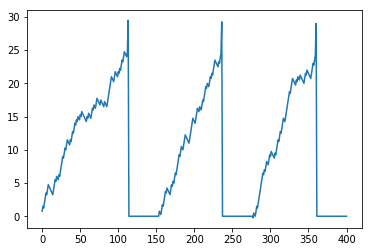

In [13]:
plt.plot(Pn)

In [14]:
#yukarıdaki aksiyon potansiyelinin 
for i in range(len(S)):
    print("Spike : ",S[i],"membrane potential :",Pn[i]," Time ",time[i])
    print("_______________________________________________________________________")   

Spike :  1 membrane potential : 0.75  Time  0.0
_______________________________________________________________________
Spike :  1 membrane potential : 1.5  Time  0.125
_______________________________________________________________________
Spike :  0 membrane potential : 1.25  Time  0.25
_______________________________________________________________________
Spike :  1 membrane potential : 2.0  Time  0.375
_______________________________________________________________________
Spike :  1 membrane potential : 2.75  Time  0.5
_______________________________________________________________________
Spike :  1 membrane potential : 3.5  Time  0.625
_______________________________________________________________________
Spike :  0 membrane potential : 3.25  Time  0.75
_______________________________________________________________________
Spike :  1 membrane potential : 4.0  Time  0.875
_______________________________________________________________________
Spike :  1 membrane potential : 4.

Spike :  0 membrane potential : 14.5  Time  24.875
_______________________________________________________________________
Spike :  0 membrane potential : 14.25  Time  25.0
_______________________________________________________________________
Spike :  0 membrane potential : 14.0  Time  25.125
_______________________________________________________________________
Spike :  1 membrane potential : 14.75  Time  25.25
_______________________________________________________________________
Spike :  1 membrane potential : 15.5  Time  25.375
_______________________________________________________________________
Spike :  1 membrane potential : 16.25  Time  25.5
_______________________________________________________________________
Spike :  0 membrane potential : 16.0  Time  25.625
_______________________________________________________________________
Spike :  0 membrane potential : 15.75  Time  25.75
_______________________________________________________________________
Spike :  1 membran

_______________________________________________________________________
Spike :  0 membrane potential : 20.5  Time  42.75
_______________________________________________________________________
Spike :  0 membrane potential : 20.25  Time  42.875
_______________________________________________________________________
Spike :  0 membrane potential : 20.0  Time  43.0
_______________________________________________________________________
Spike :  1 membrane potential : 20.75  Time  43.125
_______________________________________________________________________
Spike :  1 membrane potential : 21.5  Time  43.25
_______________________________________________________________________
Spike :  0 membrane potential : 21.25  Time  43.375
_______________________________________________________________________
Spike :  1 membrane potential : 22.0  Time  43.5
_______________________________________________________________________
Spike :  0 membrane potential : 21.75  Time  43.625
__________________

### 2) Aksiyon potansiyelini spike train'ine ayırma 

In [15]:
def spike(now,past):
    '''
    Uyarının var olup olmadığını anlamk için yazışmıştır.
    Uyarının var olup olmadığını bir önceki potensiyel ile karşılaştırarak bulabiliriz. 
    Bir önceki degere göre  membran potansiyeli artmış ise bir uyarı almıştır ve spike 1 döndürür. 
    Eğer Bir önceki degere göre  membran potansiyeli azalmış ise bir uyarı almamıştır ve spike 0 döndürür. 
    '''
    if now>past:
        return 1
    return 0

In [16]:
spike(now=15,past=7.8)

1

In [17]:
spike(now=1,past=7.8)

0

In [18]:
spike_train= np.array([])
for i,value in enumerate(Pn):
    
    if i==0:#ilk elaman 0 değeri ile karşılaştırılacak çünkü ondan önce elaman yok.
        spike_train = np.append(spike_train,spike(now=value,past=0))
    else:
        spike_train = np.append(spike_train,spike(now=value,past=Pn[i-1]))
        

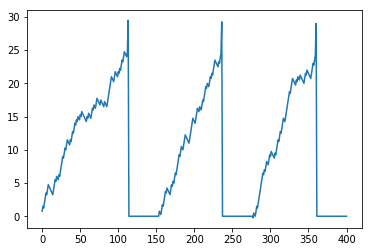

In [19]:
plt.plot(Pn) # potansiyel grafiğini hatırlayalım

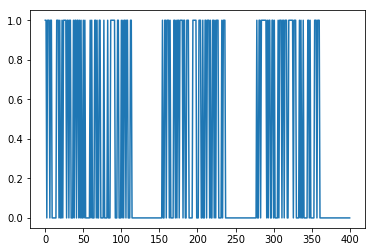

In [21]:
plt.plot(spike_train) 

--------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------

Aşağıdaki eşitlik için False çıkanlar ,refractory periodunda  denk düşen uyarıların bazıları 1 olmasına rağmen ateşleme olmadığı için 0 olarak düştüğünden dolayı.

In [22]:
spike_train== S 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False, False,  True, False, False,  True,
        True,  True,